<a href="https://colab.research.google.com/github/karthikb4232/DEEP-LEARNING-CSA4705/blob/main/P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

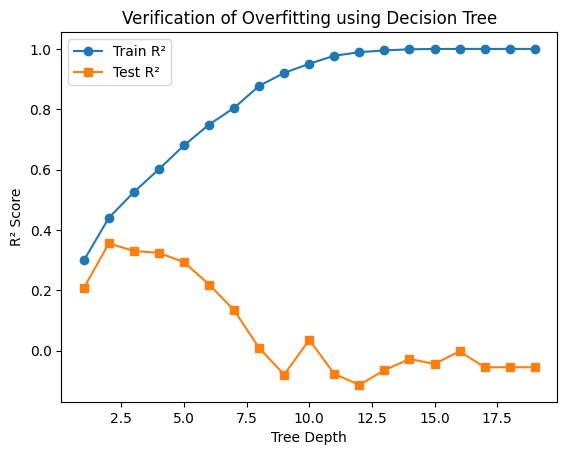

Best Depth: 2
Train R² at Best Depth: 0.44
Test R² at Best Depth : 0.355


In [1]:
!pip install scikit-learn matplotlib pandas --quiet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

train_scores = []
test_scores = []
depth_range = range(1, 20)

for depth in depth_range:
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_scores.append(train_r2)
    test_scores.append(test_r2)

plt.plot(depth_range, train_scores, label="Train R²", marker='o')
plt.plot(depth_range, test_scores, label="Test R²", marker='s')
plt.xlabel("Tree Depth")
plt.ylabel("R² Score")
plt.title("Verification of Overfitting using Decision Tree")
plt.legend()
plt.show()

best_depth = np.argmax(test_scores) + 1
print("Best Depth:", best_depth)
print("Train R² at Best Depth:", round(train_scores[best_depth-1], 3))
print("Test R² at Best Depth :", round(test_scores[best_depth-1], 3))
